# 3D Plots

In [1]:
import os, sys
sys.path.append("..")

# Results loading and processing

## Specify all models

In [2]:
models = {
    'base':{
        'high': {
            'config': '../logs/BetaVAE_Unbiased_2Corridors/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_Unbiased_2Corridors/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_Unbiased_2Corridors/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_Unbiased_2Corridors/max_c_0.3/checkpoints/last.ckpt'
        },
    },
    'task0':{
        
        'high': {
            'config': '../logs/BetaVAE_CLF_task0/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task0/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_CLF_task0/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task0/max_c_0.3/checkpoints/last.ckpt'
        },
    },

    'task1': {
        'high': {
            'config': '../logs/BetaVAE_CLF_task1/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task1/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_CLF_task1/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task1/max_c_0.3/checkpoints/last.ckpt'
        },
    },

    'task2':{
        'high': {
            'config': '../logs/BetaVAE_CLF_task2/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task2/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_CLF_task2/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task2/max_c_0.3/checkpoints/last.ckpt'
        },
    },

    'task3':{
    
        'high': {
            'config': '../logs/BetaVAE_CLF_task3/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task3/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_CLF_task3/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_CLF_task3/max_c_0.3/checkpoints/last.ckpt'
        },  
    },
    'taskAll': {
        'high': {
            'config': '../logs/BetaVAE_MultiCLF/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_MultiCLF/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_MultiCLF/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_MultiCLF/max_c_0.3/checkpoints/last.ckpt'
        }
    },
    'bottomBias':{
        'high': {
            'config': '../logs/BetaVAE_BottomBiasL2000R260_2Corridors/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_BottomBiasL2000R260_2Corridors/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_BottomBiasL2000R260_2Corridors/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_BottomBiasL2000R260_2Corridors/max_c_0.3/checkpoints/last.ckpt'
        },
    },
    'alignBias':{
        'high': {
            'config': '../logs/BetaVAE_AlignBias3000vs300_2Corridors/max_c_10/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_AlignBias3000vs300_2Corridors/max_c_10/checkpoints/last.ckpt'
        },
        'low': {
            'config': '../logs/BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3/hparams.yaml',
            'data_path': '../data/mazes_200k_2corridors_13x13.csv',
            'ckpt': '../logs/BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3/checkpoints/last.ckpt'
        }
    }
}

## Specify data subset

In [3]:
import pandas as pd

def get_idx2label(row):
    return f'{row[169]},{row[170]}' 

data = pd.read_csv('../data/mazes_200k_2corridors_13x13.csv', header=None)
data = data.iloc[180_000:]
data['diff'] = data.iloc[:,169] - data.iloc[:,170]
#data = data.sort_values(by=['diff'])
n_imgs = 1500
idxs = data.sample(n_imgs).index
selected_idxs = [
    185_044, #0,12
    199_915, #2,10
    194_158, #4,8
    189_971, #6,6
    190_889, #8,4
    187_869, #10,2
    193_280, #12,0
    191126, #0,0
    185419, #2,2
    198997, #10,10
    197722, #12,12
    195734, #2,4
    194955, #4,2
    198524, #8,10
    185387, #10,8
    198185, #6,12
    192299, #6,0
    191412, #12,6
    188274, #0,6
    #185250, #6,4
    #196000, #6,8
    190549, #1,5
    190769, #5,1
    186536, #7,11
    188431, #11,7
]
idxs = idxs.union(selected_idxs)
data = data.loc[idxs].sort_values(by=['diff'])
idxs = data.index
idx2label = data.apply(get_idx2label, axis=1).to_dict()

reidxs = {idx: i for i, idx in enumerate(idxs)}
reidx2label = {reidxs[idx]: idx2label[idx] for idx in idxs}
selected_reidxs = [reidxs[selected_idx] for selected_idx in selected_idxs]


# idx to be annotated in the scatter plot
idx_toLabel = []#list(range(0, n_imgs, 50))
idx_toLabel.extend(selected_reidxs)

---

## Load and process corresponding results

In [4]:
import pickle
from src.utils.out_processing import Results

r = Results(
    path2data='../data/mazes_200k_2corridors_13x13.csv',
    models=models,
    idxs=idxs
)
#r.load(**{'n_components': 3, 'n_jobs':20, 'n_neighbors':15}) #'random_state':20})
r.load(**{'n_components': 3, 'n_jobs':20, 'random_state':20})
r.reidx2label = reidx2label
r.idx2label = idx_toLabel

with open('processed/3D_latent_results.pkl', 'wb') as f:
    pickle.dump(r, f)

/home/leo/.python-envs/bvae-env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/leo/.python-envs/bvae-env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/leo/.python-envs/bvae-env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/leo/.python-envs/bvae-env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'

# Analysis

In [2]:
import pickle
r = pickle.load(open('processed/3D_latent_results.pkl', 'rb'))

In [3]:
task2name = {
    'task2': 'E2M1',
    'task3': 'E2M2',
    'task1': 'E2M3',
    'task0': 'E2M4',
    'taskAll': 'E2M5',
    'bottomBias': 'E1M1',
    'alignBias': 'E1M2'
}

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
from plotly.graph_objects import Layout

# Set layout with background color you want (rgba values)
# This one is for white background
layout = Layout(plot_bgcolor='rgba(0,0,0,0)')



fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
    #subplot_titles=['High Capacity', 'Low Capacity'],
    horizontal_spacing=0.001,
    #layout=layout
)

my_task = 'base'

for i, capacity in enumerate(['high', 'low']):
    
    showlegend = True
    if i > 0:
        showlegend = False 

    if my_task in ['taskAll', 'task0']:
        colordict = {k:v for k,v in enumerate(px.colors.qualitative.Alphabet*4)}
    else:
        colordict = {
            0:  'green', #px.colors.qualitative.Pastel2[0],
            1:  'orange' #px.colors.qualitative.Pastel2[1],
        }

    mc_dist = r.__getattribute__(my_task).__getattribute__(capacity)
    emb = mc_dist.emb
    y = mc_dist.y
    #y = r.__getattribute__('task2').__getattribute__(capacity).y#mc_dist.y

    df = pd.DataFrame(emb, columns=['x', 'y', 'z'])
    if my_task in ['base']:
        df['label'] = np.zeros(len(y)).reshape(-1,1)
    else:
        df['label'] = y
    for a,b in df.groupby('label'):
        b = b.values
        fig.add_trace(
            go.Scatter3d(
                x=b[:,0],
                y=b[:,1],
                z=b[:,2],
                name=a,
                legendgroup=a,
                showlegend=showlegend,
                mode='markers',
                text=list(r.reidx2label.values()),
                marker=dict(
                    size=4,
                    color=colordict[a],
                    #color=a,                # set color to an array/list of desired values
                    #colorscale=px.colors.qualitative.Vivid_r,
                    line=dict(
                            color='white',
                            width=0,
                    ),
                    opacity=0.8
                )
            ),
            row=1,
            col=i+1
        )


if my_task in ['taskAll', 'task0']:
    legendfontsize = 12
else:
    legendfontsize = 17

fig.update_layout(
    #autosize=True,
    height=700,
    width=1300,
    #title_text=f'{task2name[my_task]} - 3D Latent Space',
    #plot_bgcolor='white',
    legend=dict(
        font=dict(size=legendfontsize),
        itemsizing='constant'
    ),
    legend_tracegroupgap=1
)


fig.show()

In [36]:
df

x  y         z
0     0.462626  0 -0.043991
1     0.534626  0 -0.042931
2     0.421344  0 -0.048113
3     0.503463  0 -0.038736
4     0.395165  0 -0.017093
...        ... ..       ...
1518 -0.652987  1 -0.349717
1519 -0.622068  1 -0.301608
1520 -0.589793  1 -0.473162
1521 -0.733633  1 -0.397844
1522 -0.700488  1 -0.427174

[1523 rows x 3 columns]

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
    subplot_titles=['High Capacity', 'Low Capacity']
)

my_task = 'bottomBias'

for i, capacity in enumerate(['high', 'low']):

    mc_dist = r.__getattribute__(my_task).__getattribute__(capacity)
    emb = mc_dist.emb
    y = mc_dist.y
    #y = r.__getattribute__('task2').__getattribute__(capacity).y#mc_dist.y

    for a,b in
    fig.add_trace(
        go.Scatter3d(
            x=emb[:,0],
            y=emb[:,1],
            z=emb[:,2],
            mode='markers',
            name=f'{i}',
            text=list(r.reidx2label.values()),
            marker=dict(
                size=4,
                color=y,                # set color to an array/list of desired values
                colorscale=px.colors.qualitative.Vivid_r,
                line=dict(
                        color='white',
                        width=0,
                ),
                opacity=0.8
            )
        ),
        row=1,
        col=i+1
    )

fig.update_layout(
    height=700,
    width=1300,
    title_text=f'{task2name[my_task]} - 3D Latent Space'
)

fig.show()

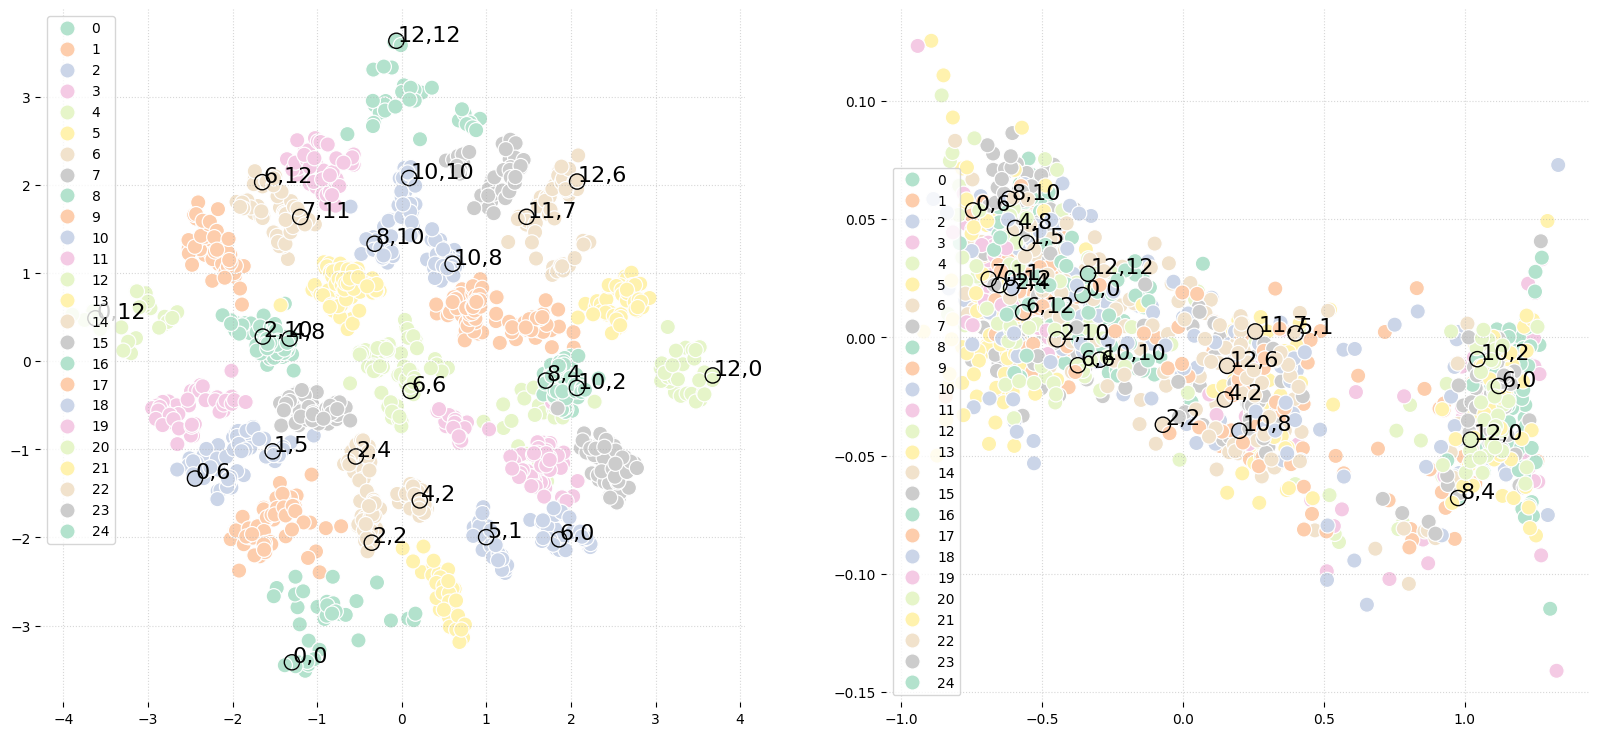

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_embeddings(emb, y, idx_toLabel, reidx2label, title, palette='Pastel2', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    else:
        fig = None
    #ax.set_title(title)
    sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=y, palette=palette, ax=ax, s=120)
    #ax.set_xticks([])
    #ax.set_yticks([])
    eps = 0.01
    for i in idx_toLabel:
        txt = reidx2label[i]
        ax.annotate(txt, (emb[i,0]+eps, emb[i,1]), size=16)
        ax.scatter(x=emb[i,0], y=emb[i,1], facecolor='none', edgecolor='black', s=120)
    return fig, ax



my_task = 'taskAll'

fig = plt.figure(figsize=(20,9))

for i, capacity in enumerate(['high', 'low']):

    mc_dist = r.__getattribute__(my_task).__getattribute__(capacity)
    emb = mc_dist.emb
    y = mc_dist.y
    #y = r.__getattribute__('task2').__getattribute__(capacity).y


    ax = fig.add_subplot(1,2,i+1)
    plot_embeddings(emb, y, r.idx2label, r.reidx2label, '', ax=ax)
    ax.spines[:].set_visible(False)
    ax.grid(linestyle=':', alpha=.5)

fig.show()

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
    subplot_titles=['High Capacity', 'Low Capacity']
)

my_task = 'task2'

for i, capacity in enumerate(['high', 'low']):

    mc_dist = r.__getattribute__(my_task).__getattribute__(capacity)
    emb = mc_dist.emb
    #y = r.__getattribute__('task2').__getattribute__(capacity).y#mc_dist.y
    y = mc_dist.y

    fig.add_trace(
        go.Scatter3d(
            x=emb[:,0],
            y=emb[:,1],
            z=emb[:,2],
            mode='markers',
            text=list(r.reidx2label.values()),
            marker=dict(
                size=4,
                color=y,                # set color to an array/list of desired values
                colorscale=px.colors.qualitative.Vivid_r,
                line=dict(
                        color='lightgrey',
                        width=0.01,
                ),
                opacity=0.8
            )
        ),
        row=1,
        col=i+1
    )

fig.update_layout(
    height=800,
    width=1300,
    title_text=f'{my_task} - 3D Latent Space'
)

fig.show()

# Dataset

### Balanced Dataset

In [5]:
import pandas as pd

def get_idx2label(row):
    return f'{row[169]},{row[170]}' 

data = pd.read_csv('../data/mazes_200k_2corridors_13x13.csv', header=None)
data = data.iloc[180_000:]
data.index = range(180000, 180000+len(data))
data['diff'] = data.iloc[:,169] - data.iloc[:,170]
#data = data.sort_values(by=['diff'])
n_imgs = 1500
idxs = data.sample(n_imgs).index
selected_idxs = [
    185_044, #0,12
    199_915, #2,10
    194_158, #4,8
    189_971, #6,6
    190_889, #8,4
    187_869, #10,2
    193_280, #12,0
    191126, #0,0
    185419, #2,2
    198997, #10,10
    197722, #12,12
    195734, #2,4
    194955, #4,2
    198524, #8,10
    185387, #10,8
    198185, #6,12
    192299, #6,0
    191412, #12,6
    188274, #0,6
    #185250, #6,4
    #196000, #6,8
    190549, #1,5
    190769, #5,1
    186536, #7,11
    188431, #11,7
]
idxs = idxs.union(selected_idxs)
data = data.loc[idxs].sort_values(by=['diff'])
idxs = data.index
idx2label = data.apply(get_idx2label, axis=1).to_dict()

reidxs = {idx: i for i, idx in enumerate(idxs)}
reidx2label = {reidxs[idx]: idx2label[idx] for idx in idxs}
selected_reidxs = [reidxs[selected_idx] for selected_idx in selected_idxs]


# idx to be annotated in the scatter plot
idx_toLabel = []#list(range(0, n_imgs, 50))
idx_toLabel.extend(selected_reidxs)

import matplotlib.pyplot as plt
import seaborn as sns

def plot_embeddings(emb, y, idx_toLabel, reidx2label, title, palette='Pastel2', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    else:
        fig = None
    #ax.set_title(title)
    sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=y, palette=palette, ax=ax, s=120)
    #ax.set_xticks([])
    #ax.set_yticks([])
    eps = 0.01
    for i in idx_toLabel:
        txt = reidx2label[i]
        ax.annotate(txt, (emb[i,0]+eps, emb[i,1]), size=16)
        ax.scatter(x=emb[i,0], y=emb[i,1], facecolor='none', edgecolor='black', s=120)
    return fig, ax

In [4]:
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence(
    homology_dimensions=(0, 1, 2, 4)
)

X = data.sample(200).iloc[:,:169].values

diagrams = VR.fit_transform([X])
VR.plot(diagrams)

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.manifold import MDS, Isomap

fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
    subplot_titles=['MDS', 'Isomap']
)

my_task = 'Input Space'

aa = [
    MDS(n_components=3, n_jobs=20, random_state=20),
    Isomap(n_components=3, n_jobs=20, n_neighbors=20),
]


X = data.iloc[:,:169].values
y = data.loc[:, 'diff'].values

for i, embedder in enumerate(aa):

    emb = embedder.fit_transform(X)

    fig.add_trace(
        go.Scatter3d(
            x=emb[:,0],
            y=emb[:,1],
            z=emb[:,2],
            mode='markers',
            text=list(reidx2label.values()),
            marker=dict(
                size=4,
                color=y,                # set color to an array/list of desired values
                colorscale=px.colors.qualitative.Vivid_r,
                line=dict(
                        color='lightgrey',
                        width=0.01,
                ),
                opacity=0.8
            )
        ),
        row=1,
        col=i+1
    )

fig.update_layout(
    height=800,
    width=1300,
    title_text=f'{my_task} - 3D Latent Space'
)

fig.show()

/home/leo/.python-envs/bvae-env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



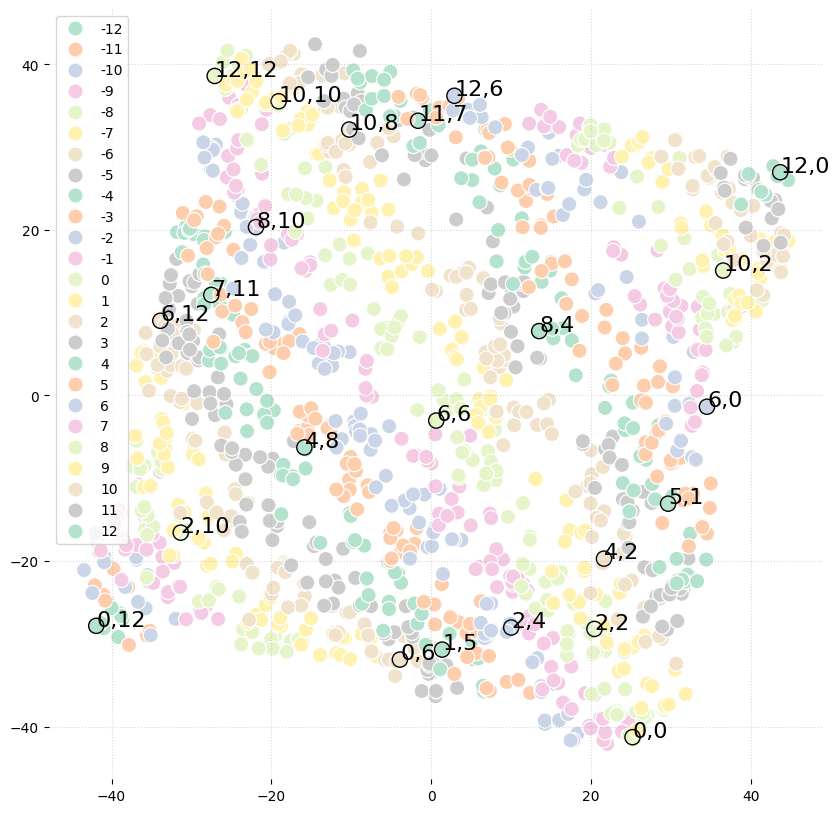

In [25]:
X = data.iloc[:,:169].values
y = data.iloc[:, -3:-1].values

from sklearn.manifold import MDS, Isomap
import matplotlib.pyplot as plt

# mds = MDS(n_components=2, n_jobs=20)
mds = Isomap(n_components=2, n_jobs=20)
emb = mds.fit_transform(X)

fig, ax = plt.subplots(figsize=(10, 10))
plot_embeddings(emb, data['diff'].values, idx_toLabel, reidx2label, 'MDS', ax=ax)
ax.spines[:].set_visible(False)
ax.grid(linestyle=':', alpha=.5)

### bottomBias Dataset

In [7]:
import pandas as pd

def get_idx2label(row):
    return f'{row[169]},{row[170]}' 

# data = pd.read_csv('../data/mazes_200k_2corridors_13x13.csv', header=None)
data = pd.read_csv('../data/mazes_200k_2corridors_BottomBiasL2000R260.csv', header=None)
data = data.iloc[180_000:]
data['diff'] = data.iloc[:,169] - data.iloc[:,170]
#data = data.sort_values(by=['diff'])
n_imgs = 1500
idxs = data.sample(n_imgs).index
selected_idxs = [
    185_044, #0,12
    199_915, #2,10
    194_158, #4,8
    189_971, #6,6
    190_889, #8,4
    187_869, #10,2
    193_280, #12,0
    191126, #0,0
    185419, #2,2
    198997, #10,10
    197722, #12,12
    195734, #2,4
    194955, #4,2
    198524, #8,10
    185387, #10,8
    198185, #6,12
    192299, #6,0
    191412, #12,6
    188274, #0,6
    #185250, #6,4
    #196000, #6,8
    190549, #1,5
    190769, #5,1
    186536, #7,11
    188431, #11,7
]
idxs = idxs.union(selected_idxs)
data = data.loc[idxs].sort_values(by=['diff'])
idxs = data.index
idx2label = data.apply(get_idx2label, axis=1).to_dict()

reidxs = {idx: i for i, idx in enumerate(idxs)}
reidx2label = {reidxs[idx]: idx2label[idx] for idx in idxs}
selected_reidxs = [reidxs[selected_idx] for selected_idx in selected_idxs]


# idx to be annotated in the scatter plot
idx_toLabel = []#list(range(0, n_imgs, 50))
idx_toLabel.extend(selected_reidxs)

import matplotlib.pyplot as plt
import seaborn as sns

def plot_embeddings(emb, y, idx_toLabel, reidx2label, title, palette='Pastel2', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    else:
        fig = None
    #ax.set_title(title)
    sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=y, palette=palette, ax=ax, s=120)
    #ax.set_xticks([])
    #ax.set_yticks([])
    eps = 0.01
    for i in idx_toLabel:
        txt = reidx2label[i]
        ax.annotate(txt, (emb[i,0]+eps, emb[i,1]), size=16)
        ax.scatter(x=emb[i,0], y=emb[i,1], facecolor='none', edgecolor='black', s=120)
    return fig, ax

In [11]:
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence(
    homology_dimensions=(0, 1, 2)
)

X = data.sample(700).iloc[:,:169].values

diagrams = VR.fit_transform([X])
VR.plot(diagrams)

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.manifold import MDS, Isomap

fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
    subplot_titles=['MDS', 'Isomap']
)

my_task = 'Input Space'

aa = [
    MDS(n_components=3, n_jobs=20, random_state=20),
    Isomap(n_components=3, n_jobs=20, radius=5, n_neighbors=None)#, n_neighbors=5),
]


X = data.iloc[:,:169].values
y = data.loc[:, 'diff'].values

for i, embedder in enumerate(aa):

    emb = embedder.fit_transform(X)

    fig.add_trace(
        go.Scatter3d(
            x=emb[:,0],
            y=emb[:,1],
            z=emb[:,2],
            mode='markers',
            text=list(reidx2label.values()),
            marker=dict(
                size=4,
                color=y,                # set color to an array/list of desired values
                colorscale=px.colors.qualitative.Vivid_r,
                line=dict(
                        color='lightgrey',
                        width=0.01,
                ),
                opacity=0.8
            )
        ),
        row=1,
        col=i+1
    )

fig.update_layout(
    height=800,
    width=1300,
    title_text=f'{my_task} - 3D Latent Space'
)

fig.show()

/home/leo/.python-envs/bvae-env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



### alignBias Dataset

In [12]:
import pandas as pd

def get_idx2label(row):
    return f'{row[169]},{row[170]}' 

# data = pd.read_csv('../data/mazes_200k_2corridors_13x13.csv', header=None)
# data = pd.read_csv('../data/mazes_200k_2corridors_BottomBiasL2000R260.csv', header=None)
data = pd.read_csv('../data/mazes_85k_2corridors_AlignedBias3000vs300.csv', header=None)
#data = data.iloc[180_000:]
data.index = range(180000, 180000+len(data))
data['diff'] = data.iloc[:,169] - data.iloc[:,170]
#data = data.sort_values(by=['diff'])
n_imgs = 1500
idxs = data.sample(n_imgs).index
selected_idxs = [
    185_044, #0,12
    199_915, #2,10
    194_158, #4,8
    189_971, #6,6
    190_889, #8,4
    187_869, #10,2
    193_280, #12,0
    191126, #0,0
    185419, #2,2
    198997, #10,10
    197722, #12,12
    195734, #2,4
    194955, #4,2
    198524, #8,10
    185387, #10,8
    198185, #6,12
    192299, #6,0
    191412, #12,6
    188274, #0,6
    #185250, #6,4
    #196000, #6,8
    190549, #1,5
    190769, #5,1
    186536, #7,11
    188431, #11,7
]
idxs = idxs.union(selected_idxs)
data = data.loc[idxs].sort_values(by=['diff'])
idxs = data.index
idx2label = data.apply(get_idx2label, axis=1).to_dict()

reidxs = {idx: i for i, idx in enumerate(idxs)}
reidx2label = {reidxs[idx]: idx2label[idx] for idx in idxs}
selected_reidxs = [reidxs[selected_idx] for selected_idx in selected_idxs]


# idx to be annotated in the scatter plot
idx_toLabel = []#list(range(0, n_imgs, 50))
idx_toLabel.extend(selected_reidxs)

import matplotlib.pyplot as plt
import seaborn as sns

def plot_embeddings(emb, y, idx_toLabel, reidx2label, title, palette='Pastel2', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    else:
        fig = None
    #ax.set_title(title)
    sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=y, palette=palette, ax=ax, s=120)
    #ax.set_xticks([])
    #ax.set_yticks([])
    eps = 0.01
    for i in idx_toLabel:
        txt = reidx2label[i]
        ax.annotate(txt, (emb[i,0]+eps, emb[i,1]), size=16)
        ax.scatter(x=emb[i,0], y=emb[i,1], facecolor='none', edgecolor='black', s=120)
    return fig, ax

In [13]:
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence(
    homology_dimensions=(0, 1, 2)
)

X = data.sample(700).iloc[:,:169].values

diagrams = VR.fit_transform([X])
VR.plot(diagrams)

In [37]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.manifold import MDS, Isomap

fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
    subplot_titles=['MDS', 'Isomap']
)

my_task = 'Input Space'

aa = [
    MDS(n_components=3, n_jobs=20, random_state=20),
    Isomap(n_components=3, n_jobs=20, n_neighbors=20),
]


X = data.iloc[:,:169].values
y = data.loc[:, 'diff'].values

for i, embedder in enumerate(aa):

    emb = embedder.fit_transform(X)

    fig.add_trace(
        go.Scatter3d(
            x=emb[:,0],
            y=emb[:,1],
            z=emb[:,2],
            mode='markers',
            text=list(reidx2label.values()),
            marker=dict(
                size=4,
                color=y,                # set color to an array/list of desired values
                colorscale=px.colors.qualitative.Vivid_r,
                line=dict(
                        color='lightgrey',
                        width=0.01,
                ),
                opacity=0.8
            )
        ),
        row=1,
        col=i+1
    )

fig.update_layout(
    height=800,
    width=1300,
    title_text=f'{my_task} - 3D Latent Space'
)

fig.show()

/home/leo/.python-envs/bvae-env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

